<a href="https://colab.research.google.com/github/dianazhu9879/Momentum_Strat_Research/blob/main/TQTResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries to find linear trend and plot data
from statsmodels import regression
import statsmodels.api as sm
import scipy.stats as stats
import scipy.spatial.distance as distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:

data = yf.download("AAPL", start="2017-01-20", end="2021-01-20")
print(data.head())
print(data.columns)

/tmp/ipython-input-3797540388.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2017-01-20", end="2021-01-20")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2017-01-20  27.658251  27.761969  27.596021  27.761969  130391600
2017-01-23  27.676687  27.844941  27.605236  27.658248   88200800
2017-01-24  27.651340  27.681303  27.543012  27.554537   92844000
2017-01-25  28.091564  28.142271  27.722788  27.755056  129510400
2017-01-26  28.105391  28.220633  28.027025  28.043159  105350400
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


/tmp/ipython-input-2346494038.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = model.params[0] # Get coefficients of line
/tmp/ipython-input-2346494038.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = model.params[1]
/tmp/ipython-input-2346494038.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Y_hat'] = X * b + a


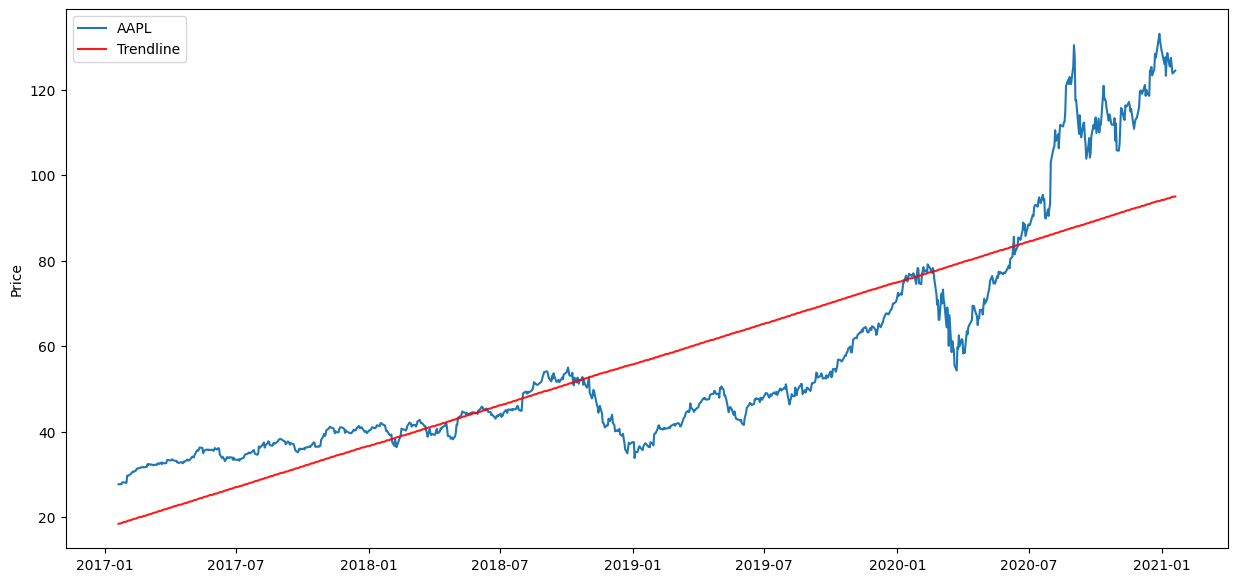

In [3]:

# Load pricing data for an asset
start = '2014-01-01'
end = '2015-01-01'
prices = data['Close']
dates = prices.index

# Plot the price of the asset over time
plt.figure(figsize=(15,7))
plt.plot(prices['AAPL'])

# Find the line of best fit to illustrate the trend
X = np.arange(len(dates))
x = sm.add_constant(X) # Add a column of ones so that line can have a y-intercept
model = regression.linear_model.OLS(prices['AAPL'], x).fit()
a = model.params[0] # Get coefficients of line
b = model.params[1]
prices['Y_hat'] = X * b + a
plt.plot(prices['Y_hat'], 'r', alpha=0.9);
plt.ylabel('Price')
plt.legend(['AAPL', 'Trendline']);
plt.show()

#Momentum on graph:
Below two functions depict momentum. First one takes old price and adds random number whereas second one adds past_returns to the data since returns that do good continue to do good in the future. Second one - much smoother line.

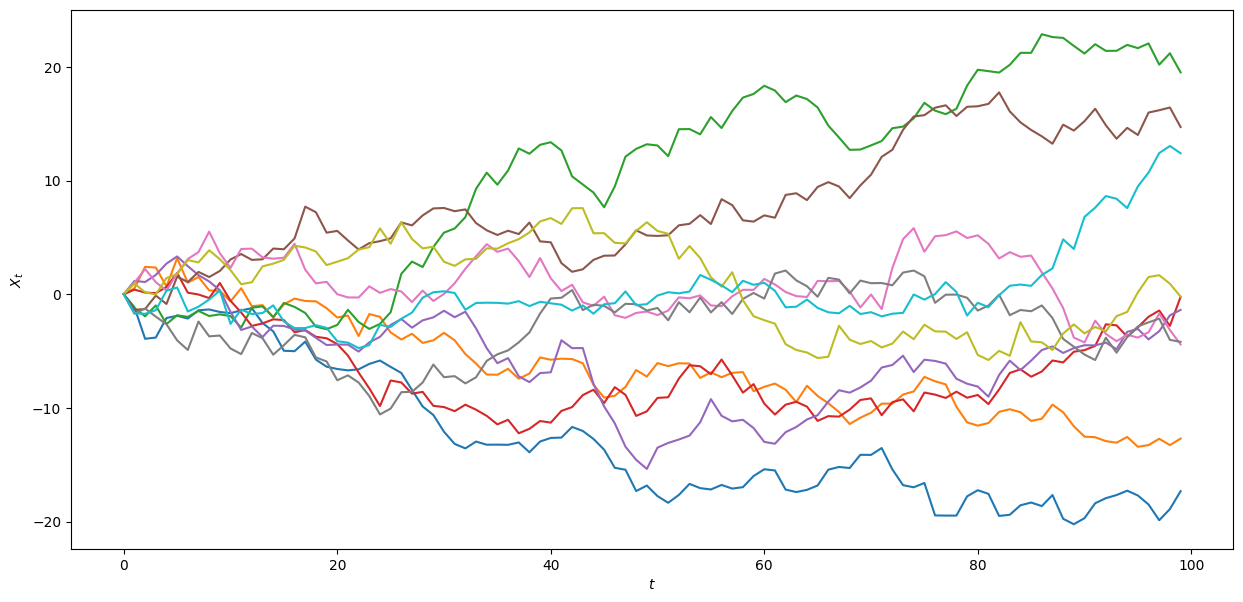

In [9]:
def generate_autocorrelated_values(N):
    X = np.zeros(N)
    for i in range(N-1):
        X[i+1] = X[i] + np.random.normal(0, 1)
    return X

plt.figure(figsize=(15,7))
for i in range(10):
    X = generate_autocorrelated_values(100)
    plt.plot(X)
plt.xlabel('$t$')
plt.ylabel('$X_t$');
plt.show()

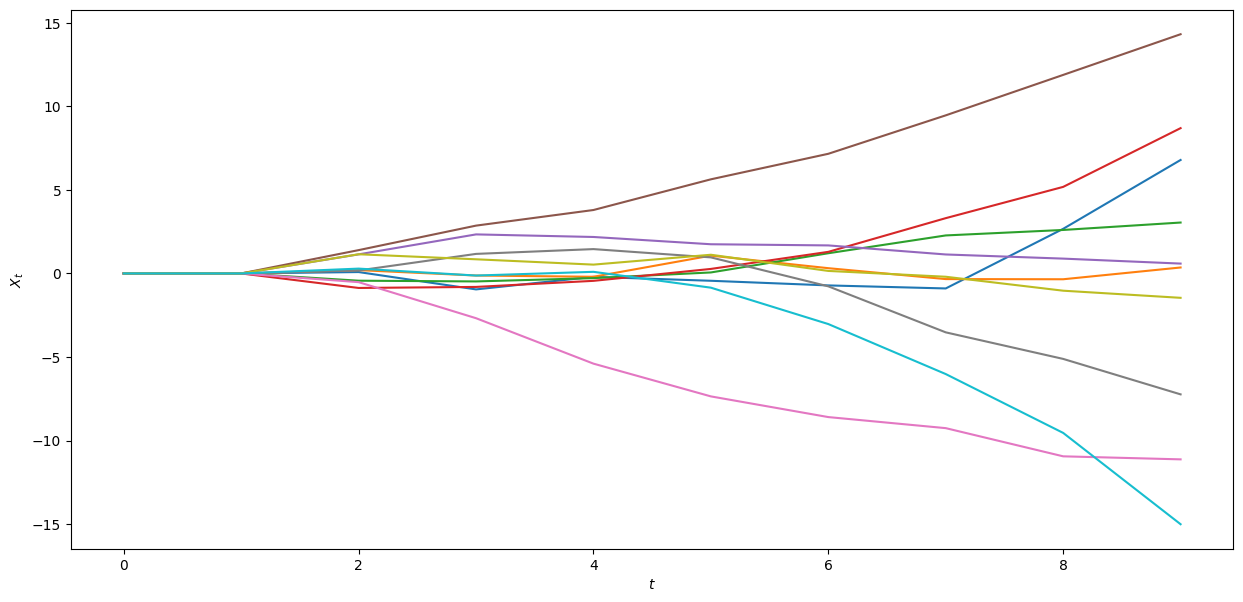

In [5]:
def generate_autocorrelated_values(N):
    X = np.zeros(N)
    for i in range(1, N-1):
        # Do the past returns 'look good' to investors
        past_returns = X[i] - X[i-1]
        # Investors hypothesize that future returns will be equal to past returns and buy at that price
        X[i+1] = X[i] + past_returns + np.random.normal(0, 1)
    return X

plt.figure(figsize=(15,7))
for i in range(10):
    X = generate_autocorrelated_values(10)
    plt.plot(X)
plt.xlabel('$t$')
plt.ylabel('$X_t$');
plt.show()

#Dickey-Fuller Test (ADF)
**adfuller(X1)** determines if the stock is stationary. If p-value > 0.05: The series is "Non-Stationary" (it wanders). If p-value < 0.05: The series is "Stationary" (it stays around a central average, "pulls" back to center).
#Application
If run regression from two non-stationary assets (p>0.05), math will indicate they're related when in reality, they're not. If the ADF test says the spread is Stationary, it means when the gap between them gets too wide, it is statistically likely to shrink back. In this instance, investors will sell the expensive one and buy the cheap one, betting on that "pull" back to the mean.
#Interpretation
The graph can be seem as upward trending - the trend will only cross a horizontal line drawn through the middle once and never again. Moreover, ADF tests output of 0.24 as p-value indicates that it's non-stationary.

In [10]:
from statsmodels.tsa.stattools import adfuller

X1 = generate_autocorrelated_values(100)
X2 = np.random.normal(0, 1, 100)

# Compute the p-value of the Dickey-Fuller statistic to test the null hypothesis that yw has a unit root
print ('X1')
_, pvalue, _, _, _, _ = adfuller(X1)
if pvalue > 0.05:
    print('We cannot reject the null hypothesis that the series has a unit root.')
else:
    print ('We reject the null hypothesis that the series has a unit root.')
print ('X2')
_, pvalue, _, _, _, _ = adfuller(X2)
if pvalue > 0.05:
    print ('We cannot reject the null hypothesis that the series has a unit root.')
else:
    print ('We reject the null hypothesis that the series has a unit root.')

X1
We cannot reject the null hypothesis that the series has a unit root.
X2
We reject the null hypothesis that the series has a unit root.


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-464067340.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['Y_hat'] = X * b + a


ADF P-value: 0.24524914287471422
NON-STATIONARY: The trend is breaking. Do not mean revert.


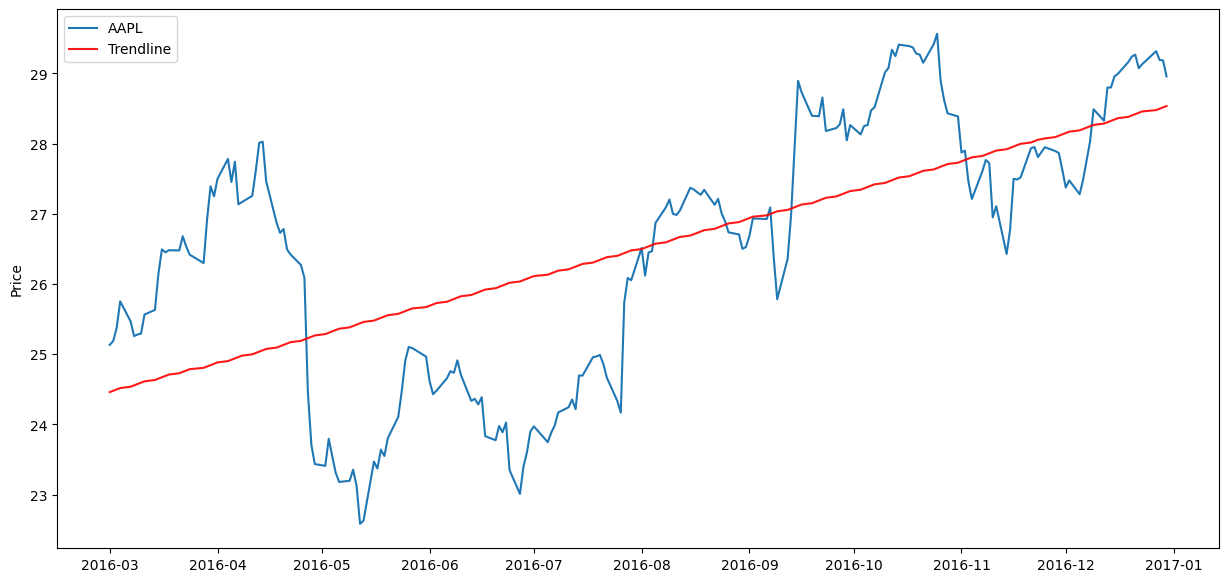

In [15]:
# Load pricing data for an asset
start = '2016-03-01'
end = '2017-01-01'
data = yf.download("AAPL", start=start, end=end, auto_adjust=False)
prices = data['Close']
dates = prices.index

# Plot the price of the asset over time
plt.figure(figsize=(15,7))
plt.plot(prices['AAPL'])

# Find the line of best fit to illustrate the trend
X = np.arange(len(dates))
x = sm.add_constant(X) # Add a column of ones so that line can have a y-intercept
model = regression.linear_model.OLS(prices['AAPL'], x).fit()
a = model.params.iloc[0] # Get coefficients of line
b = model.params.iloc[1]
prices['Y_hat'] = X * b + a
from statsmodels.tsa.stattools import adfuller
# We test (Price - Trendline) to see if the gap is stable
_, pvalue, _, _, _, _ = adfuller((prices['AAPL'] - prices['Y_hat']).dropna())

print(f'ADF P-value: {pvalue}')
if pvalue < 0.05:
    print('STATIONARY: The trend is stable. Mean reversion is tradeable.')
else:
    print('NON-STATIONARY: The trend is breaking. Do not mean revert.')
plt.plot(prices['Y_hat'], 'r', alpha=0.9);
plt.ylabel('Price')
plt.legend(['AAPL', 'Trendline']);
plt.show()

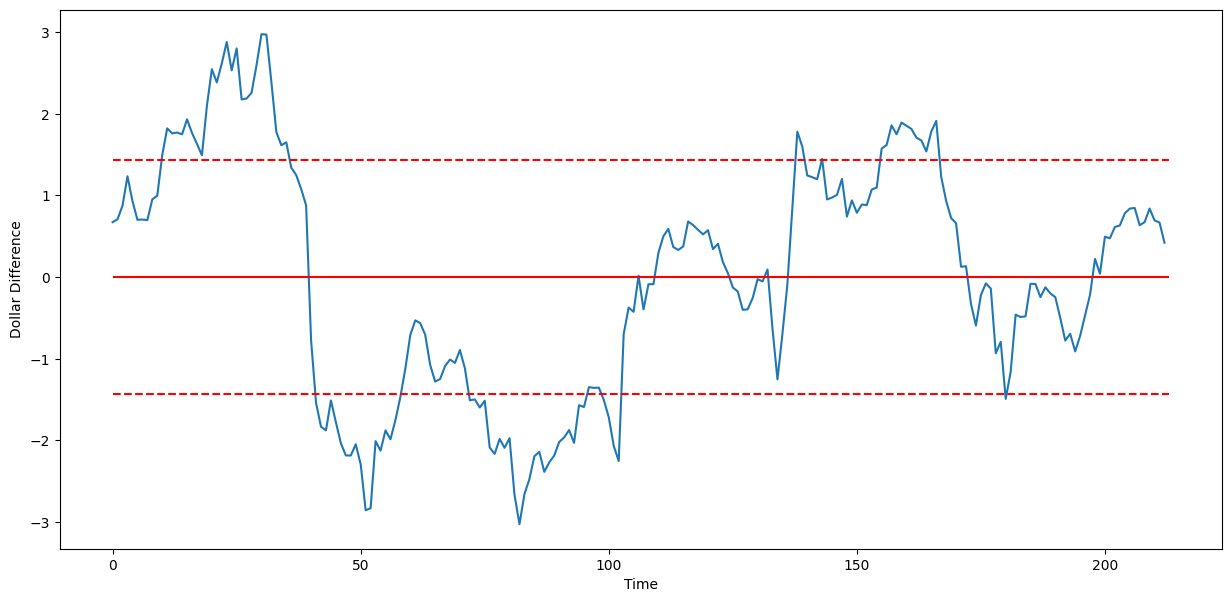

In [14]:
plt.figure(figsize=(15,7))
plt.plot((prices['AAPL'] - prices['Y_hat']).values)
plt.hlines(np.mean(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r')
plt.hlines(np.std(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r', linestyles='dashed')
plt.hlines(-np.std(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r', linestyles='dashed')
plt.xlabel('Time')
plt.ylabel('Dollar Difference')
plt.show()